<a href="https://colab.research.google.com/github/perigor/biblioteca_pandas/blob/main/modelo_de_regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Construindo um modelo de Regressão para marketing

Introdução

Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos). A fim de acompanhar o desempenho desses
investimentos, a empresa registra todos os gastos com publicidade e todos os retornos
de vendas gerados a partir desses investimentos.
Para entender melhor a relação entre as variáveis presentes nesses registros e
identificar os fatores que mais impactam na geração de leads, a empresa solicitou a
análise de um especialista em dados. Além disso, a empresa busca criar um
modelo de predição de valores para estimar o retorno de vendas que pode ser gerado
a partir de um determinado investimento em publicidade.

Etapas de Desenvolvimento:

1º - Análise descitiva;
2º - Análise Exploratória;
3º - Modelagem;
4º - Calulando predição.

In [ ]:
#importando biblioteca pandas.

import pandas as pd
import seaborn as sns

In [ ]:
# Importando base de dados.

mkt = pd.read_csv("/content/MKT.csv")
mkt

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [ ]:
# Cabeçalho do dataset.
# Dados numéricos de youtube, facebook e newspaper são valores investidos com publicidade.
# Dados numérios de Sales é o total de vendas.

mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Verificar informações do dataset

mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Não há dados nulos
# Dados estão em formato Float64

In [ ]:
# Uso da função ".describe()" para verificar dados estatísticos

mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


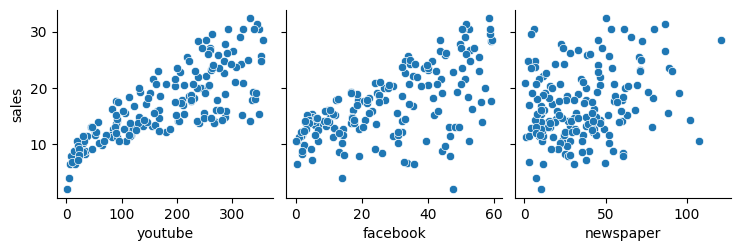

In [ ]:
# Verificando relação linear entre variáveis X (plataformas) e Y (vendas) para vizualizar comportamento das vendas conforme investimento.
# Newspapper apresenta maior disperção.
sns.pairplot(mkt, x_vars=["youtube", "facebook", "newspaper"], y_vars="sales")

In [ ]:
# Verificando correlação

mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

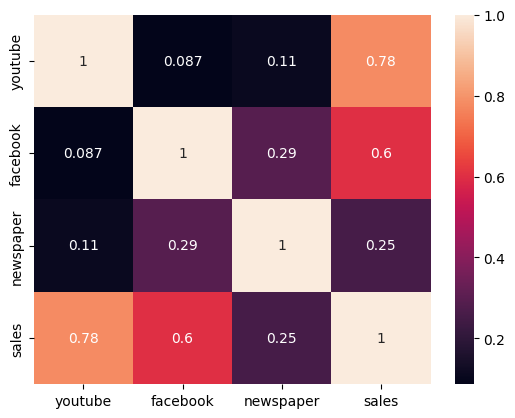

In [ ]:
sns.heatmap(mkt.corr(), annot=True)

In [ ]:
mkt.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
# Criando variáveis para predição.

X = mkt[["youtube", "facebook", "newspaper"]]
Y = mkt[["sales"]]

In [ ]:
# Importando a biblioteca Sklearn (específica para ML).
# train_test_split para testar as bases de treino e teste.

from sklearn.model_selection import train_test_split

In [ ]:
# train_size = base de treino (estimado de 0.7 à 0.8).
# test_size = base de teste (estimado em 0.3).
# random_state = pergar dados de forma aleatória (42).

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size= 0.7, test_size= 0.3, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
# Treinar modelo


from sklearn.linear_model import  LinearRegression

In [ ]:
# Regressão Linear

lm = LinearRegression()

In [ ]:
# .fit = treinar

lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
# R2_score = Quanto maior o R2_Score maior a probabilidade de acerto  (negativo - 1.0).

from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [ ]:
print("r_quadrado", r)

r_quadrado 0.882423505618885


In [ ]:
# R_Quadrado de 0.88 significa que há 88% de chances quando mudarem as variáveis X, há 88% de chances de mundança na variável Y.
# Há linaeridade nesse modelo.

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'sales')

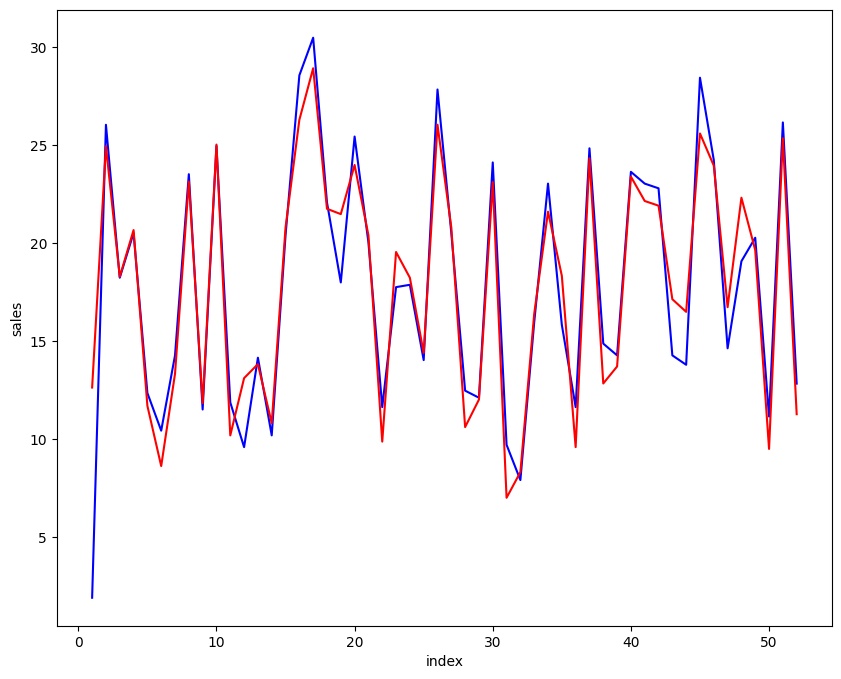

In [ ]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("index")
plt.ylabel(("sales"))

In [ ]:
# Azul = Resultado real
# Vermelho = Resultado predicto